<a href="https://colab.research.google.com/github/edmenciab733/qosf/blob/main/qosf_cohorte8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit_optimization
!pip install tweedledum

In [2]:
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms.minimum_eigensolvers import QAOA
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler

## Exercise 1 / Ejercicio 1

Given a positive integer and an list of prime numbers, look for the two prime numbers, that sum the positive number. Consider an appropriate number of qubits and explain why your proposal is valid for all kinds of numbers in case.





### Explanation of the Proposal / Explicación de la propuesta


- English: Regarding my proposal, it involves implementing an optimization algorithm to maximize the sum of the set of values. To find the target value and meet the problem's requirement, we have assumed constraints.
  * Two linear constraints are defined. The first ensures that the sum of the selected values equals the target value (target). The second constraint ensures that exactly two elements are selected.
  * Finally, the function returns the optimal decision variables (result.x), the status of the result (result.status.name), and the ansatz used by QAOA (qaoa.ansatz).

- Español: Con respecto a mi propuesta, consiste en implementar un algoritmo de optimización para maximizar la suma de el conjunto de valores. Para encontrar el valor objetivo y cumplir con el requisito del problema hemos asumido restricciones.

 * Se definen dos restricciones lineales. La primera asegura que la suma de los valores seleccionados sea igual al valor objetivo (target). La segunda restricción asegura que exactamente dos elementos sean seleccionados.
 * Finalmente, la función retorna las variables de decisión óptimas (result.x), el estado del resultado (result.status.name), y el ansatz utilizado por QAOA (qaoa.ansatz).

In [3]:
def find_the_primes_numbers(target, valores):
    # Crear un programa cuadrático
    qp = QuadraticProgram()

    # Añadir variables binarias para cada valor
    for i in range(len(valores)):
        qp.binary_var(f'x{i}')

    # Definir la función objetivo para maximizar la suma de los valores seleccionados
    linear_coef = {f'x{i}': valores[i] for i in range(len(valores))}
    qp.maximize(linear=linear_coef)
    qp.linear_constraint(linear=linear_coef, sense='EQ', rhs=target, name='sumatoria_restriccion')

    select_exactly_2 = {f'x{i}': 1 for i in range(len(valores))}
    qp.linear_constraint(linear=select_exactly_2, sense='EQ', rhs=2, name='select_exactly_2')


    # Crear una instancia de QAOA
    qaoa = QAOA(sampler=Sampler() ,optimizer=COBYLA())

    # Crear una instancia de MinimumEigenOptimizer utilizando QAOA
    optimizer = MinimumEigenOptimizer(min_eigen_solver=qaoa)

    # Resolver el problema de optimización
    result = optimizer.solve(qp)
    # Mostrar la solución
    return result.x, result.status.name, qaoa.ansatz



In [4]:
valores = [1,3,5,7,11,13,15, 17]

target = int(input("Ingrese el valor objetivo: "))
x, resultado, circ = find_the_primes_numbers(target, valores)

Ingrese el valor objetivo: 18


In [5]:
print("La solución es: {}".format(resultado))
valores_seleccionados = [valores[i] for i, valor in enumerate(x) if valor == 1]
if(len(valores_seleccionados) > 0):
    print("La valores que cumplen la condición son: {}".format(valores_seleccionados))

La solución es: SUCCESS
La valores que cumplen la condición son: [7, 11]


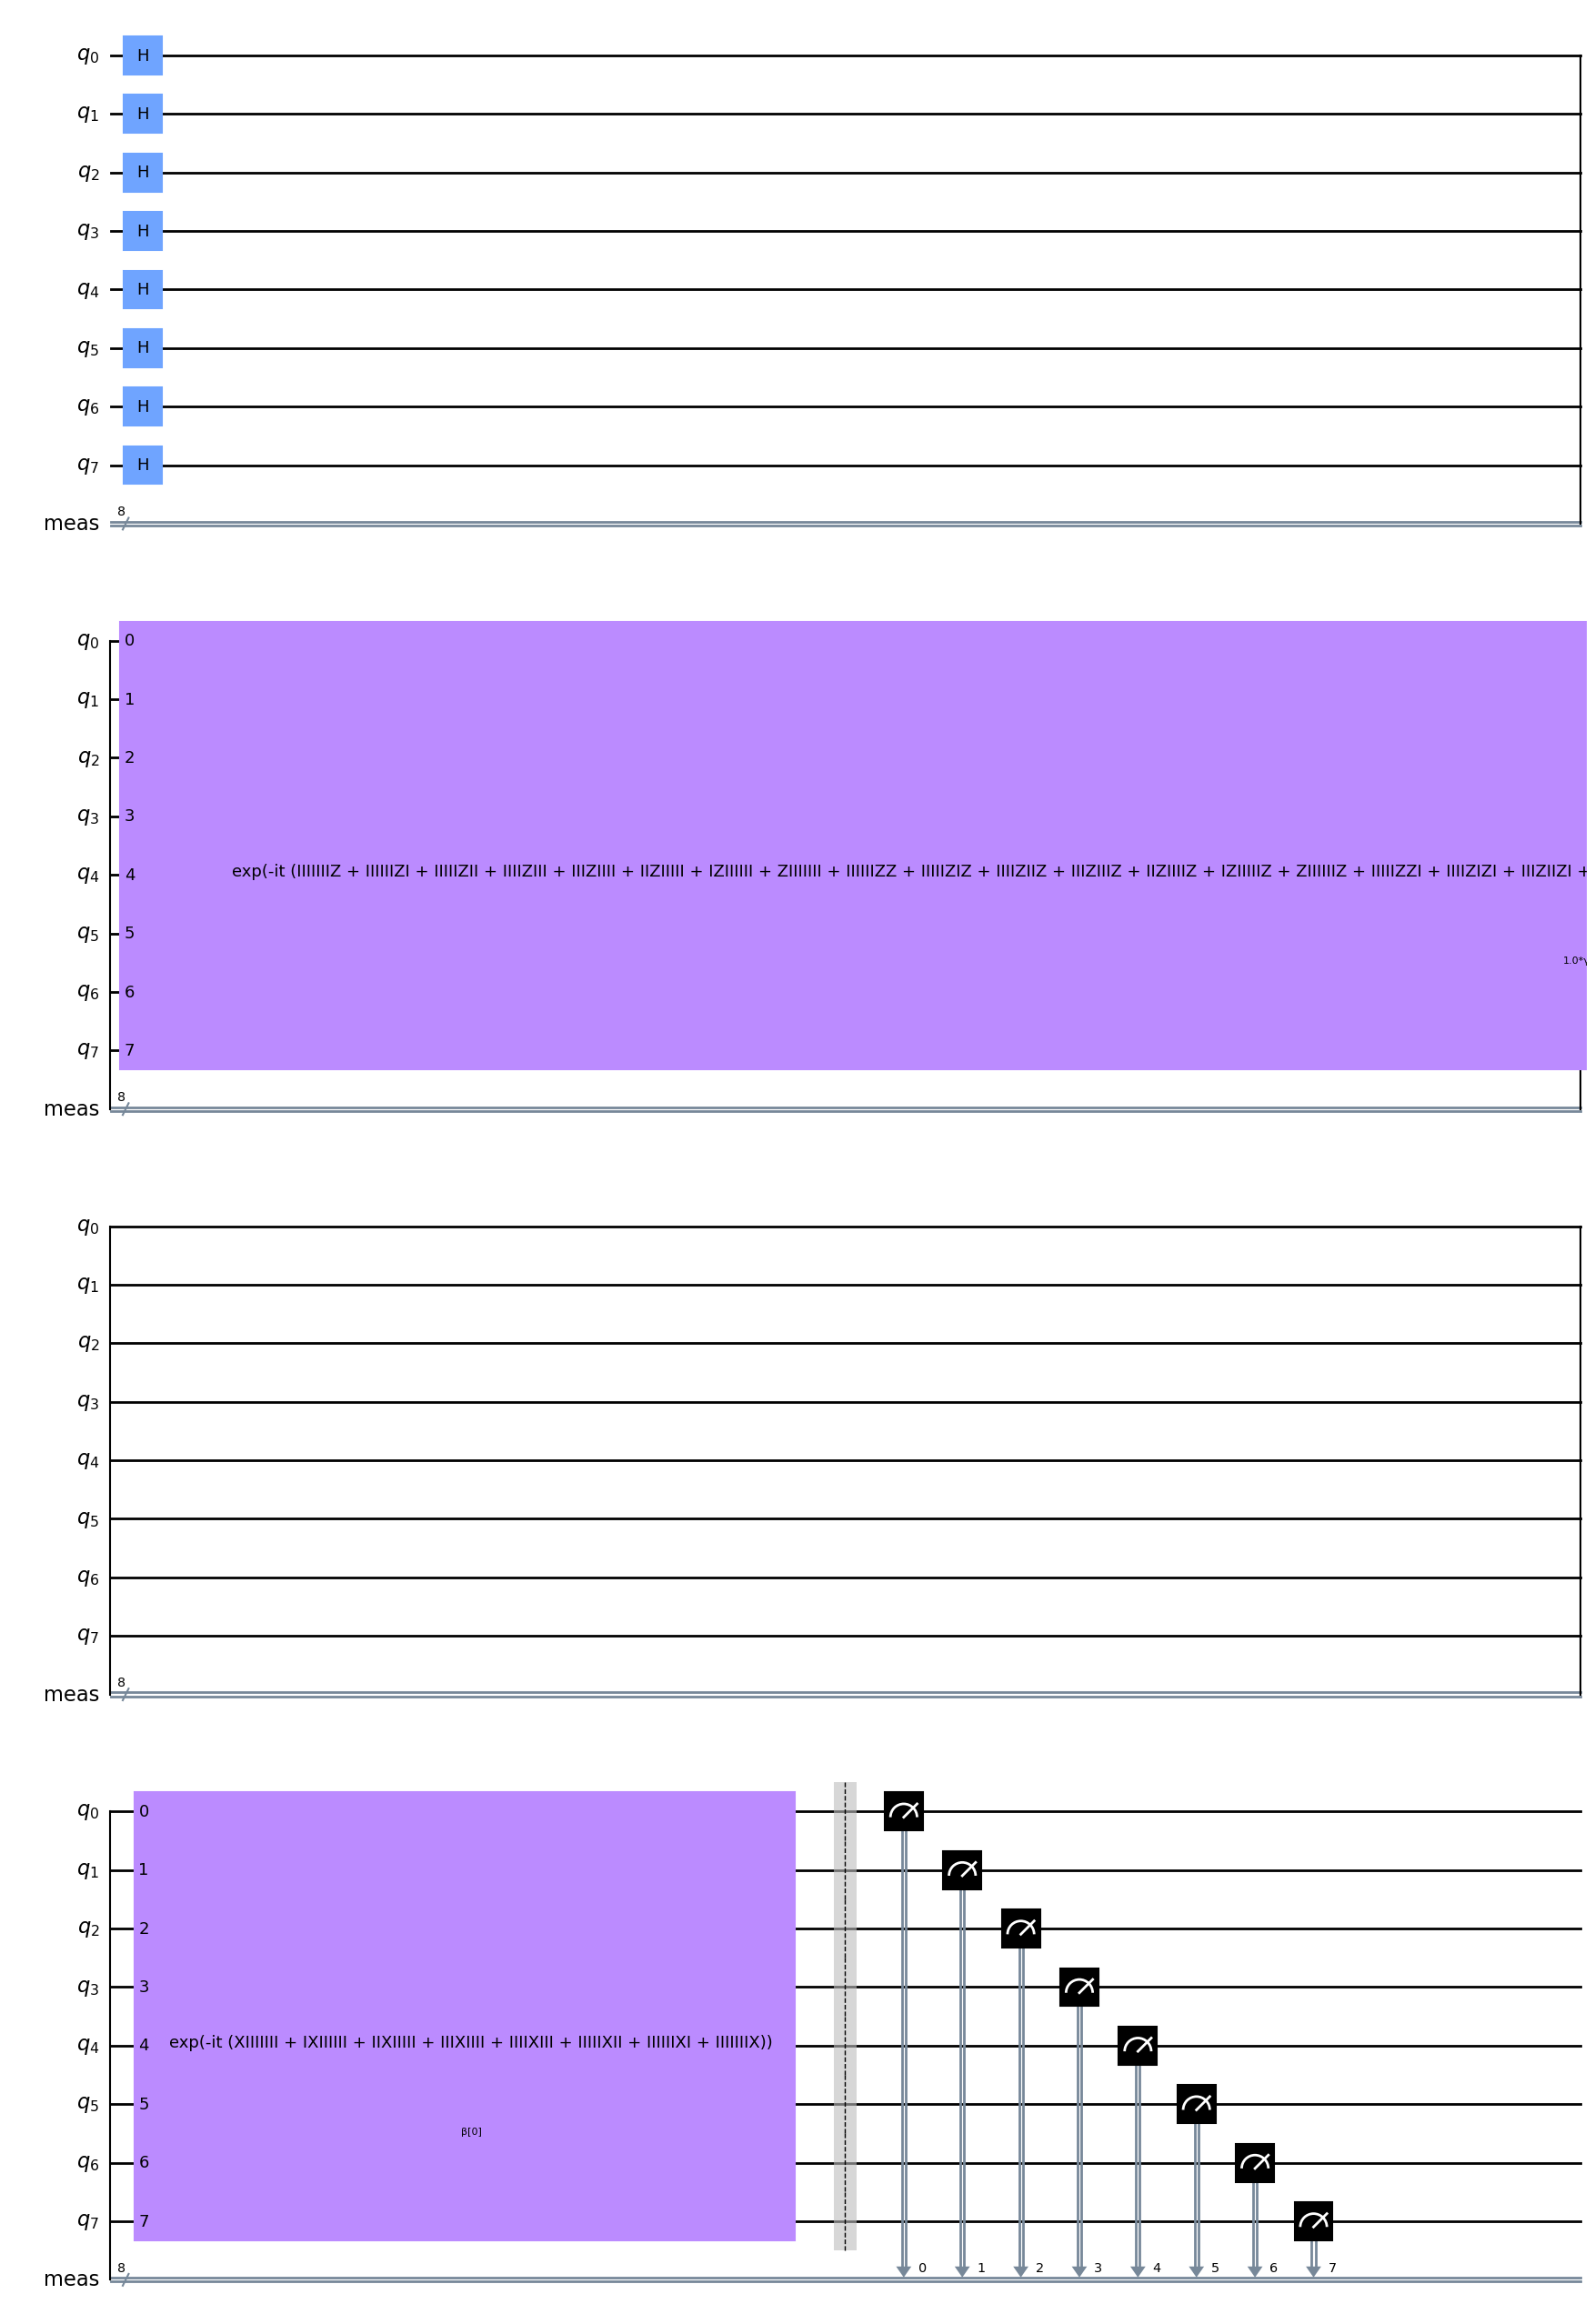

In [6]:
circ.draw("mpl")

## Exercise 2 / Ejercicio 2

Given a list of integer numbers, look for a negative number in the list. Consider an appropriate number of qubits and explain why your proposal is valid for all kinds of numbers in case

### Explanation of the Proposal / Explicación de la propuesta


- English: In this case, the proposal is linked to converting the numbers to two's complement, and then separating the most significant bits (the first bit of each number, recalling that if it is 1 the number is negative, otherwise, it is positive). Lastly, the proposal is similar to the previous one: maximize the value, with the sole restriction that if the sum of all the values is greater than or equal to 1, it means that at least one of the numbers is negative. The function calcular_bits is also used to adapt any value.

- Español: En este caso, la propuesta está vinculada a convertir los números a complemento a dos, y luego separar los bits más significativos (el primer bit de cada número, recordando que si es 1 el número es negativo, de lo contrario, es positivo). Por último, la propuesta es similar a la anterior: maximizar el valor, con la única restricción de que si la suma de todos los valores es mayor o igual a 1, significa que al menos uno de los números es negativo. También se utiliza la función calcular_bits para adaptar cualquier valor

In [7]:
def calcular_bits(numeros):
    """Calcula el número de bits necesario para representar todos los números en la lista."""
    max_valor = max(abs(n) for n in numeros)
    bits = 0
    while max_valor:
        bits += 1
        max_valor >>= 1
    return bits + 1  # Añadir un bit adicional para el bit de signo

def a_complemento_a_dos(n, bits):
    """Convierte un número decimal a su representación en complemento a dos."""
    if n < 0:
        return bin((1 << bits) + n)[-bits:]  # Usar el slicing para asegurar la longitud correcta
    else:
        return bin(n)[2:].zfill(bits)

In [8]:
def find_negative_numbers(valores):
    # Crear un programa cuadrático
    qp = QuadraticProgram()

    # Añadir variables binarias para cada valor
    for i in range(len(valores)):
        qp.binary_var(f'x{i}')

    # Definir la función objetivo para maximizar la suma de los valores seleccionados
    linear_coef = {f'x{i}': valores[i] for i in range(len(valores))}
    qp.maximize(linear=linear_coef)
    qp.linear_constraint(linear=linear_coef, sense='GE', rhs=1, name='sumatoria_restriccion')

    # Crear una instancia de QAOA
    qaoa = QAOA(sampler=Sampler() ,optimizer=COBYLA())

    # Crear una instancia de MinimumEigenOptimizer utilizando QAOA
    optimizer = MinimumEigenOptimizer(min_eigen_solver=qaoa)

    # Resolver el problema de optimización
    result = optimizer.solve(qp)
    # Mostrar la solución
    if result.status.name == "SUCCESS":
        return  True, qaoa.ansatz
    else:
         return  False, qaoa.ansatz


In [9]:
numeros = [3, -7]
bits = calcular_bits(numeros)
binarios = [a_complemento_a_dos(n, bits) for n in numeros]
valores = [int(elemento[0])for elemento in binarios]
resultado, circ = find_negative_numbers(valores)

In [10]:
print("La lista contiene al menos un negativo: {}".format(resultado))

La lista contiene al menos un negativo: True


## Ejercicio 4

En el Swap Test, el resultado de la medida del primer qubit (qubit 0) nos da información sobre la similitud entre los dos estados que estamos comparando. La probabilidad de medir el estado ∣0⟩ en el qubit 0 está relacionada con la fidelidad (F) entre los dos estados ∣ψ⟩ y ∣ϕ⟩ que estamos comparando, según la relación:

Suponiendo que de 1000 disparos 9000 hayan dado 0 el calculo sería:

$ P(0) = \frac{(1 + F)}{2} $

$ P(0)=  \frac{900}{1000} = 0.9 $

$ 0.9 = \frac{1+F}{2} $

$ F = 0.8 $


Esto indica que los dos estados que estás comparando tienen una fidelidad de 0.8, lo que sugiere una alta similitud entre los dos estados, aunque no son idénticos.



## 1

$ \psi_1 = \begin{pmatrix}
\sqrt{0.3} \\
\sqrt{0.7}
\end{pmatrix} $


$ \psi_2 = \begin{pmatrix}
\sqrt{0.6} \\
\sqrt{0.4}
\end{pmatrix} $

In [67]:
import numpy as np
from qiskit.circuit.quantumcircuit import QuantumCircuit

def swap_test_circuit(state1, state2):
    qc = QuantumCircuit(3, 1)  # Create a quantum circuit with 3 qubits and 1 classical bit
    qc.initialize(state1, 1)  # Initialize the second qubit with state1
    qc.initialize(state2, 2)  # Initialize the third qubit with state2
    qc.h(0)  # Apply a Hadamard gate to the first qubit
    qc.cswap(0, 1, 2)  # Apply a controlled-SWAP gate with the first qubit as control
    qc.h(0)  # Apply a Hadamard gate to the first qubit again
    qc.measure(0, 0)  # Measure the first qubit and store the result in the classical bit
    return qc

# Define the states you want to compare
state1 = [np.sqrt(0.3), np.sqrt(0.7)]
state2 = [np.sqrt(0.6), np.sqrt(0.4)]

# Get the Swap Test circuit
swap_test = swap_test_circuit(state1, state2)

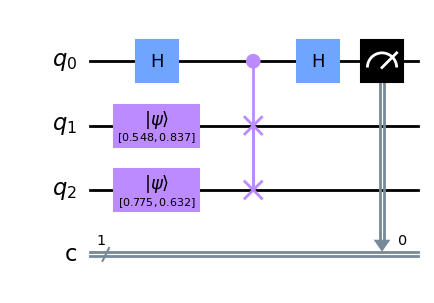

In [68]:
swap_test.draw("mpl")

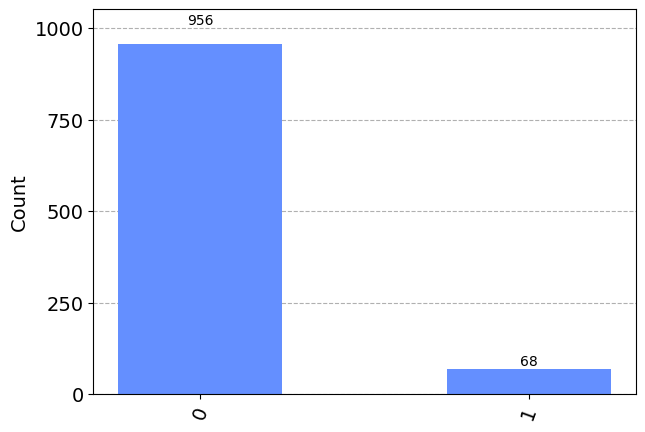

In [69]:
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
# Use Aer's qasm_simulator
simulator = Aer.get_backend('aer_simulator')

# Compile and run the Swap Test circuit
compiled_circuit = transpile(swap_test, simulator)
result = simulator.run(compiled_circuit).result()

# Get and display the counts
counts = result.get_counts()
plot_histogram(counts)

In [71]:
shots =   counts['0'] +  counts['1']
p_0 =  counts['0'] / shots
f = 2 * p_0  -1
print(f"Fidelizada del resultado {f}")

Fidelizada del resultado 0.8671875


# 2

$ \psi_1  = \begin{pmatrix}
\sqrt{0.1} \\
\sqrt{0.2} \\
\sqrt{0.6} \\
\sqrt{0.1}
\end{pmatrix} $



$ \psi_2 = \begin{pmatrix}
\sqrt{0} \\
\sqrt{0.5} \\
\sqrt{0.1} \\
\sqrt{0.4}
\end{pmatrix} $



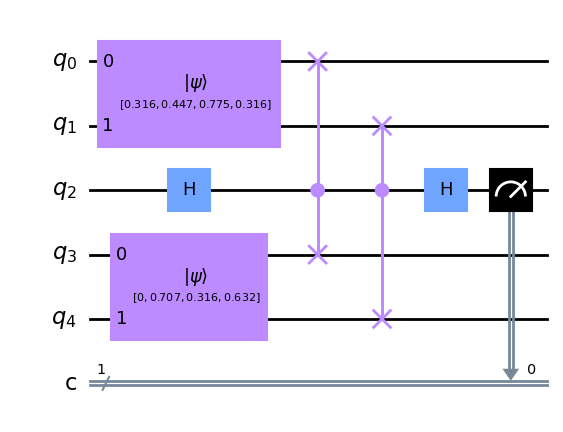

In [72]:
def swap_test_circuit(state1, state2):
    qc = QuantumCircuit(5, 1)  # Create a quantum circuit with 3 qubits and 1 classical bit
    # Measure the first qubit and store the result in the classical bit
    qc.initialize(state1, [0, 1])
    qc.initialize(state2, [3, 4])
    qc.h(2)
    qc.cswap(2, 0, 3)
    qc.cswap(2, 1, 4)
    qc.h(2)
    qc.measure(2, 0)
    return qc

# Define the states you want to compare
state1 = [np.sqrt(0.1), np.sqrt(0.2), np.sqrt(0.6), np.sqrt(0.1)]
state2 = [np.sqrt(0), np.sqrt(0.5), np.sqrt(0.1), np.sqrt(0.4)]
swap_test = swap_test_circuit(state1, state2)
swap_test.draw("mpl")

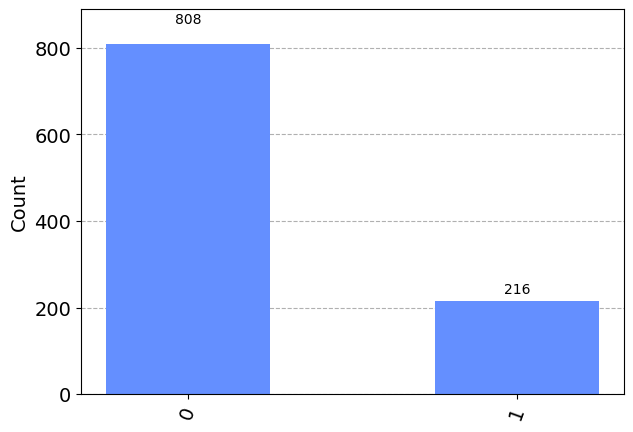

In [73]:
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
# Use Aer's qasm_simulator
simulator = Aer.get_backend('aer_simulator')

# Compile and run the Swap Test circuit
compiled_circuit = transpile(swap_test, simulator)
result = simulator.run(compiled_circuit).result()

# Get and display the counts
counts = result.get_counts()
plot_histogram(counts)

In [74]:
shots =   counts['0'] +  counts['1']
p_0 =  counts['0'] / shots
f = 2 * p_0  -1
print(f"Fidelizada del resultado {f}")

Fidelizada del resultado 0.578125
